- select fittest
- crossing 
- mutation


In [151]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [152]:
feature_range = np.array([[-100,100],[-100,100]])

In [153]:
def populate(feature_range,count=1000):
    population = []
    
    for i in range(count):
        item = []
        for feature in feature_range:
            f_val = np.random.uniform(feature[0],feature[1])
            item.append(f_val)
        population.append(item)
    return np.array(population)

In [154]:
population = populate(feature_range,100)

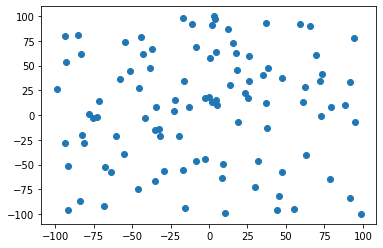

In [155]:
plt.scatter(population[:,0],population[:,1])

In [156]:
viruses = [(np.array([0.0,0.0]),1)]#1 is the power 

In [157]:
viruses

[(array([0., 0.]), 1)]


### on thebasis of sorted fitness and then reduce the population by the factor of 2
#### start

In [158]:
def fitness(population,viruses):
    fit = None
    for virus in viruses:
        v =  np.sqrt(np.sum((population - virus[0]) **2,axis=1))*virus[1] # we can write - (np.sqrt....) to reverse 
        if fit is None:
            fit = v
        else:
            fit=fit+v
    return np.argsort(fit)

In [159]:
fitness(population,viruses)

array([59, 71, 92, 38, 39, 85, 99, 16, 22, 86, 90, 47, 25, 31, 93, 23, 56,
       29, 45, 12, 70, 54, 27, 69, 87, 11, 96, 75, 66,  8, 24, 63, 81,  6,
       83, 51, 32, 20, 40, 46, 14, 10, 44, 58, 48, 79, 65, 35, 97, 42, 28,
       43, 21, 72, 74,  3, 36, 49, 61, 68, 73,  7, 52, 13, 50, 94, 37, 76,
       82, 34, 30, 55, 17, 78, 19,  5,  2, 53, 60, 89, 26, 80, 98, 64,  4,
        9,  1, 62, 91, 95, 84, 33, 18, 15, 67, 77, 88,  0, 57, 41],
      dtype=int64)

In [160]:
def select(population,viruses,factor=2):
    fit = fitness(population,viruses)[:len(population)//factor]
    
    return  population[fit]

In [161]:
new_pop = select(population,viruses)

In [162]:
new_pop

array([[  4.95605847,  10.50254603],
       [  2.1858558 ,  13.24892312],
       [-13.08528991,   7.66424839],
       [  4.72503098,  15.29157957],
       [ -2.33382841,  17.11327032],
       [  0.30401752,  17.76009061],
       [ 18.52367494,  -6.6923748 ],
       [-23.01929742,   4.44617079],
       [-22.06218271,  15.43815894],
       [-19.7428867 , -21.17296446],
       [ 25.62488922,  17.58545467],
       [ 23.37527755,  22.32815904],
       [ 13.91806966,  30.73263688],
       [-34.26068328,   8.6255201 ],
       [-32.62491988, -14.5441866 ],
       [-34.94579728, -14.82437785],
       [-16.18344357,  34.64681351],
       [-31.95085868, -21.18459241],
       [ 37.00506242,  11.79675   ],
       [ 37.55972188, -12.8264609 ],
       [-41.44524947,  -3.39703195],
       [ 25.86598459,  34.04645656],
       [ -2.72699218, -44.28889264],
       [ -8.1999459 , -46.27372992],
       [ 17.88476823,  45.37136233],
       [  8.95712906, -49.47750879],
       [-45.25238833,  26.84164875],
 

#### end
### based on distance
#### start

In [163]:
def fitness2(population,viruses):
    fit = None
    for virus in viruses:
        v = np.sqrt(np.sum((population - virus[0]) **2,axis=1))*virus[1]
        if fit == None:
            fit = v
        else:
            fit=fit+v
    return fit

In [164]:
def select2(population,viruses,distance=50):
    total = fitness2(population,viruses)
    fit = population[total <= distance]
    
    return  fit

#### end

In [165]:
new_pop2 = select2(population,viruses)

In [166]:
new_pop2

array([[ 37.55972188, -12.8264609 ],
       [-23.01929742,   4.44617079],
       [-22.06218271,  15.43815894],
       [-34.94579728, -14.82437785],
       [ 13.91806966,  30.73263688],
       [ -2.72699218, -44.28889264],
       [-31.95085868, -21.18459241],
       [-34.26068328,   8.6255201 ],
       [  4.72503098,  15.29157957],
       [ -2.33382841,  17.11327032],
       [ 37.00506242,  11.79675   ],
       [ 23.37527755,  22.32815904],
       [ 25.86598459,  34.04645656],
       [-16.18344357,  34.64681351],
       [  4.95605847,  10.50254603],
       [ -8.1999459 , -46.27372992],
       [-41.44524947,  -3.39703195],
       [  2.1858558 ,  13.24892312],
       [  0.30401752,  17.76009061],
       [-19.7428867 , -21.17296446],
       [ 17.88476823,  45.37136233],
       [ 25.62488922,  17.58545467],
       [-13.08528991,   7.66424839],
       [-32.62491988, -14.5441866 ],
       [ 18.52367494,  -6.6923748 ]])

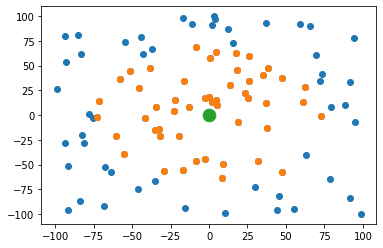

In [167]:
plt.scatter(population[:,0],population[:,1])
plt.scatter(new_pop[:,0],new_pop[:,1])
for virus in viruses:
    plt.scatter(virus[0][0],virus[0][1],s=160)

In [168]:
def mutate(item):
    return item + np.random.uniform(-4,4,len(item))




def regen(seed,target=100):
    population = []
    for i in range(target):
        parents = random.choices(seed,k=2)
        item = np.array([parents[0][0],parents[1][1]])
        item = mutate(item)
        population.append(item)
    return np.array(population)

In [169]:
gen = regen(new_pop2)

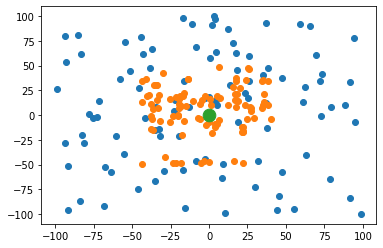

In [170]:
plt.scatter(population[:,0],population[:,1])
plt.scatter(gen[:,0],gen[:,1])
for virus in viruses:
    plt.scatter(virus[0][0],virus[0][1],s=160)

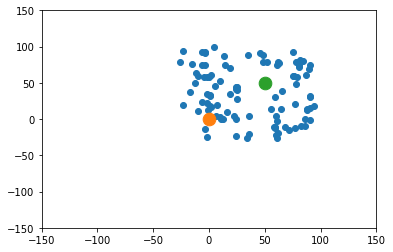

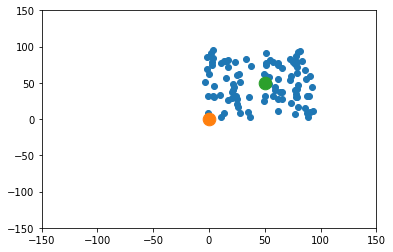

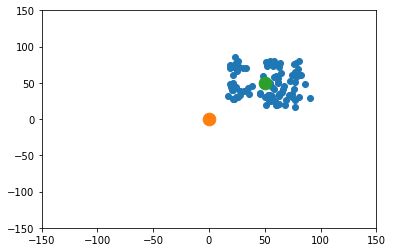

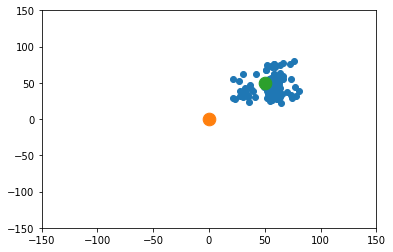

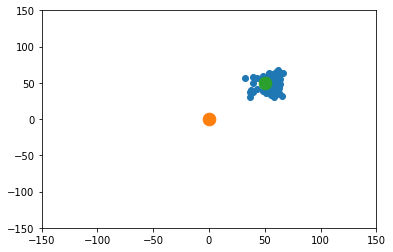

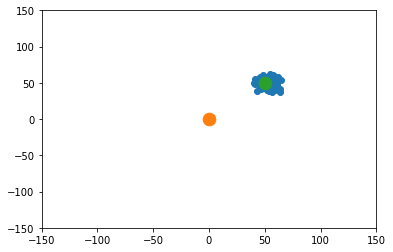

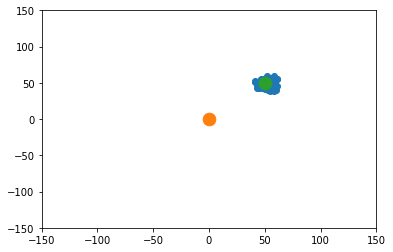

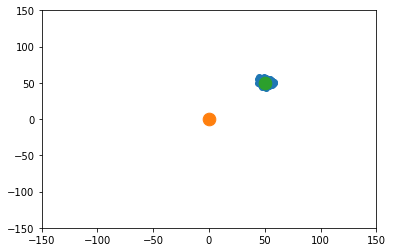

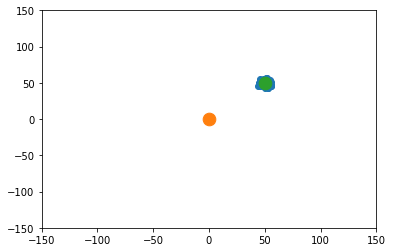

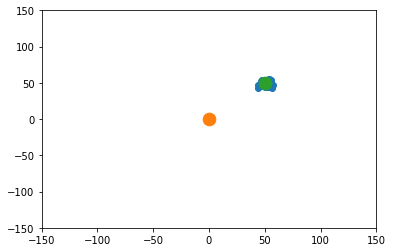

In [173]:
feature_range = np.array([[-100,100],[-100,100]])
viruses = [(np.array([0.0,0.0]),1),(np.array([50.0,50.0]),100)]#power of seconf virus is high 

population = populate(feature_range,100)
for _ in range(10):
    fit = select(population,viruses,factor=2)
    population = regen(fit,len(population))
    
    plt.figure()
    plt.xlim(-150,150)
    plt.ylim(-150,150)
    plt.scatter(population[:,0],population[:,1])
    for virus in viruses:
        plt.scatter(virus[0][0],virus[0][1],s=160)